# Loading and Displaying Well Log Data from LAS

**Created by:** Andy McDonald  
  
This notebook illustrates how to load data in from a LAS file and carry out a basic QC of the data before plotting it on a log plot.

## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
lasio is a library that has been developed to handle and work with LAS files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

%matplotlib inline 
#%matplotlib qt 

To load our file in, we can use the read() method from LASIO like so:

In [2]:
#las = lasio.read("FCIEN/NO_09_B_X1 - BELEN/NO_09_B_X1 - Logs/NO_09_B_X1 - Logs.las")
las = lasio.read("FCIEN/NO_10_I_X1 - ITACUMBU/NO_10_I_X1 - Logs/NO_10_I_X1 - Logs.las")
#las = lasio.read("FCIEN/NO_07_P_X1 - PELADO/NO_07_P_X1 - Logs/NO_07_P_X1 - Logs.las")

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'FCIEN/NO_10_I_X1 - ITACUMBU/NO_10_I_X1 - Logs/NO_10_I_X1 - Logs.las'

Now that our file has been loaded, we can start investigating it's contents.  
To find information out about where the file originated from, such as the well name, location and what the depth range of the file covers, we can create a simple for loop to go over each header item. Using Python's f-string we can join the items together.

In [3]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

NameError: name 'las' is not defined

In [163]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

START DEPTH (STRT): 6890.0
STOP DEPTH (STOP): 0.5
STEP (STEP): -0.5
NULL VALUE (NULL): -999.25
COMPANY (COMP): ANCAP
WELL (WELL): N0_10_I_X1
FIELD (FLD): ITACUMBU
LOCATION (LOC): ARTIGAS
COUNTY (CNTY): URUGUAY
STATE (STAT): 
COUNTRY (CTRY): 
SERVICE COMPANY (SRVC): Schlumberger
API NUMBER (API): 
LOG DATE (DATE): June 14, 1987
UNIQUE WELL ID (UWI): 
LOG REFERENCE DATUM (DATL): GROUND LEVEL (TO SEA LEVEL)
GROUND LEVEL (TO SEA LEVEL) (GL): 108.1
KELLY BUSHING (TO SEA LEVEL) (KB): 112.2
DEPTH DRILLER (TO DATL) (DEPTD): 2096.8
DEPTH LOGGER (TO DATL) (DEPTL): 2099.0
EASTING (EAST): 338824.04
NORTHING (NORTH): 6620339.63
PROJECTION NAME (PROJN): YACARE (URUGUAY)
PROJECTION (PROJT): TRANSVERSE MERCATOR
ELIPSOID (ELIP): INTERNATIONAL 1924
CENTRAL MERIDIAN (CMER): 55° 48' 0.0" W
LATITUDE OF ORIGIN (LATOR): 0° 0' 0.0" N
FALSE NORTHING (FNORT): 10002288
FALSE EASTING (FEAST): 500000
SCALE FACTOR (SFACT): 1


If we just want to extract the Well Name, we can simply call it by:

In [164]:
las.well.WELL.value
las.well.FLD.value

'ITACUMBU'

To quickly see what curves are present within the las file we can loop through `las.curves`

In [165]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT:1
DEPT:2
ILD
ILM
SFLU
SP
DT
DATA
CALI
RHOB
DRHO
PEF
LL
LU1
LU2
LU
LS
LITH
SS1
SS2
GR
NRAT
NPHI
THOR
URAN
POTA
SGR
CGR
W1NG
W2NG
W3NG
W4NG
W5NG
CS


To see what curves are present within the las file, we can repeat the process with the CurveItem object and call upon the `unit` and `descr` functions to get info on the units and the curve's description.
The enumerate function allows us to keep a count of the number of curves that are present within the file. As enumerate returns a 0 on the first loop, we need to 1 to it if we want to include the depth curve.

In [166]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT:1, Units: F, Description: DEPTH (BOREHOLE)
Curve: DEPT:2, Units: M, Description: 
Curve: ILD, Units: OHMM, Description: 
Curve: ILM, Units: OHMM, Description: 
Curve: SFLU, Units: OHMM, Description: 
Curve: SP, Units: MV, Description: 
Curve: DT, Units: US/F, Description: 
Curve: DATA, Units: , Description: 
Curve: CALI, Units: IN, Description: 
Curve: RHOB, Units: G/C3, Description: 
Curve: DRHO, Units: G/C3, Description: 
Curve: PEF, Units: , Description: 
Curve: LL, Units: HZ, Description: 
Curve: LU1, Units: HZ, Description: 
Curve: LU2, Units: HZ, Description: 
Curve: LU, Units: HZ, Description: 
Curve: LS, Units: HZ, Description: 
Curve: LITH, Units: HZ, Description: 
Curve: SS1, Units: HZ, Description: 
Curve: SS2, Units: HZ, Description: 
Curve: GR, Units: GAPI, Description: 
Curve: NRAT, Units: , Description: 
Curve: NPHI, Units: PU, Description: 
Curve: THOR, Units: PPM, Description: 
Curve: URAN, Units: PPM, Description: 
Curve: POTA, Units: PU, Description: 
Cur

## Creating a Pandas Dataframe
Data loaded in using LASIO can be converted to a pandas dataframe using the .df() function. This allows us to easily plot data and pass it into one of the many machine learning algorithms.

In [167]:
well = las.df()

The `.head()` function generates a table view of the header and the first 5 rows within the dataframe.

In [168]:
well.reset_index(drop=True, inplace=True)
well.set_index(['DEPT:2'], inplace=True)

In [169]:
well.describe()

,ILD,ILM,SFLU,SP,DT,DATA,CALI,RHOB,DRHO,PEF,...,URAN,POTA,SGR,CGR,W1NG,W2NG,W3NG,W4NG,W5NG,CS
count,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13523.000000,13780.000000,13780.000000,13780.000000,13780.000000,...,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.00000,13780.000000,13780.000000
mean,107.766926,89.324251,22.783139,80.880859,143.785475,218.877870,131.359879,121.192015,84.882362,63.369462,...,185.326128,473.234118,69.408298,66.487514,216.694043,134.203041,122.201237,86.44036,62.905464,108.976694
std,263.993632,180.731890,213.168482,73.209513,63.928449,153.875801,190.414914,52.084828,82.834447,67.968962,...,144.924225,374.378819,43.753595,30.417375,157.357841,192.220575,52.284129,83.63914,67.375905,214.395573
min,12.164000,25.840000,-22.453000,-270.438000,48.407000,100.125000,-14.113000,2.556000,-0.019000,2.995000,...,-0.643000,0.000000,12.164000,26.859000,94.719000,-14.308000,15.648000,0.00300,0.445000,2.231000
25%,12.164000,25.840000,-22.453000,1.525000,96.688000,100.125000,-14.113000,84.926000,22.613000,11.922000,...,2.222000,0.000000,12.164000,26.859000,94.719000,-14.308000,84.716000,23.51600,11.969000,2.231000
50%,107.517000,93.358000,-22.453000,135.625000,96.688000,100.125000,-14.113000,84.926000,22.613000,11.922000,...,300.000000,769.468000,103.476000,90.302000,94.719000,-14.308000,84.716000,23.51600,11.969000,2.231000
75%,107.517000,93.358000,22.803000,135.625000,227.500000,418.250000,381.750000,188.125000,193.750000,152.750000,...,300.000000,769.468000,103.476000,90.302000,423.000000,386.500000,190.125000,196.37500,151.500000,218.750000
max,2000.000000,2000.000000,1939.715000,135.625000,227.500000,418.250000,381.750000,188.125000,193.750000,152.750000,...,300.000000,769.468000,103.476000,90.302000,423.000000,386.500000,190.125000,196.37500,151.500000,1478.889000


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

In [170]:
#well['SGR'].describe()

In [171]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 13780 entries, 2100.072 to 0.004
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ILD     13780 non-null  float64
 1   ILM     13780 non-null  float64
 2   SFLU    13780 non-null  float64
 3   SP      13780 non-null  float64
 4   DT      13780 non-null  float64
 5   DATA    13523 non-null  float64
 6   CALI    13780 non-null  float64
 7   RHOB    13780 non-null  float64
 8   DRHO    13780 non-null  float64
 9   PEF     13780 non-null  float64
 10  LL      13780 non-null  float64
 11  LU1     13780 non-null  float64
 12  LU2     13780 non-null  float64
 13  LU      13780 non-null  float64
 14  LS      13780 non-null  float64
 15  LITH    13780 non-null  float64
 16  SS1     13780 non-null  float64
 17  SS2     13780 non-null  float64
 18  GR      13780 non-null  float64
 19  NRAT    13780 non-null  float64
 20  NPHI    13780 non-null  float64
 21  THOR    13780 non-null  fl

## Visualising Data Extent

Instead of the summary provided by the pandas describe() function, we can create a visualisation using matplotlib. Firstly, we need to work out where we have nulls (nan values). We can do this by creating a second dataframe and calling .notnull() on our well dataframe.  
  
As this returns a boolean (True or False) for each depth, we need to multiply by 1 to convert the values from True and False to 1 and 0 respectively.

In [172]:
#Quitamos valores 0 que estropean el ploteo

well = well.drop(well[well['CALI']==0].index)
well = well.drop(well[well['GR']==0].index)
well = well.drop(well[well['SP']==0].index)
well = well.drop(well[well['ILD']==0].index)
well = well.drop(well[well['ILD']<0].index)
well = well.drop(well[well['ILM']==0].index)


In [173]:
well_nan = well.notnull() * 1

In [174]:
well_nan.head()

,ILD,ILM,SFLU,SP,DT,DATA,CALI,RHOB,DRHO,PEF,...,URAN,POTA,SGR,CGR,W1NG,W2NG,W3NG,W4NG,W5NG,CS
DEPT:2,,,,,,,,,,,,,,,,,,,,,
2100.072,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2099.920,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2099.767,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2099.615,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2099.462,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


We can now create a summary plot of the missing data

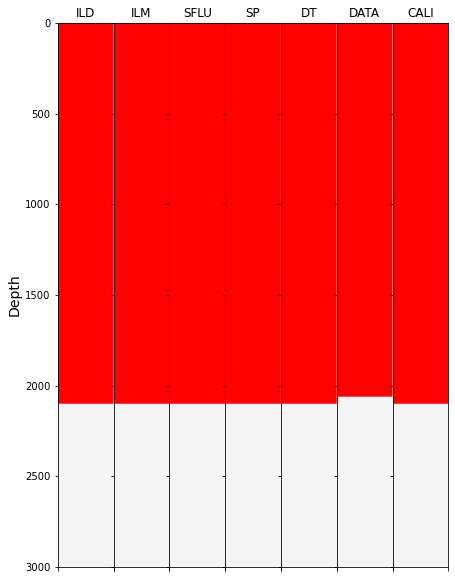

In [175]:
fig = plt.subplots(figsize=(7,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(3000, 0)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

## Plotting Log Data
Finally, we can plot our data using the code below. Essentially, the code is building up a series of subplots and plotting the data on the relevant tracks.  
  
When we add curves to the tracks, we need to set the curve's properties, including the limits, colour and labels. We can also specify the shading between curves. An example has been added to the caliper curve to show shading between a bitsize value (8.5") and the CALI curve.  
  
If there are a number of features that are common between the plots, we can iterate over them using a for loop.

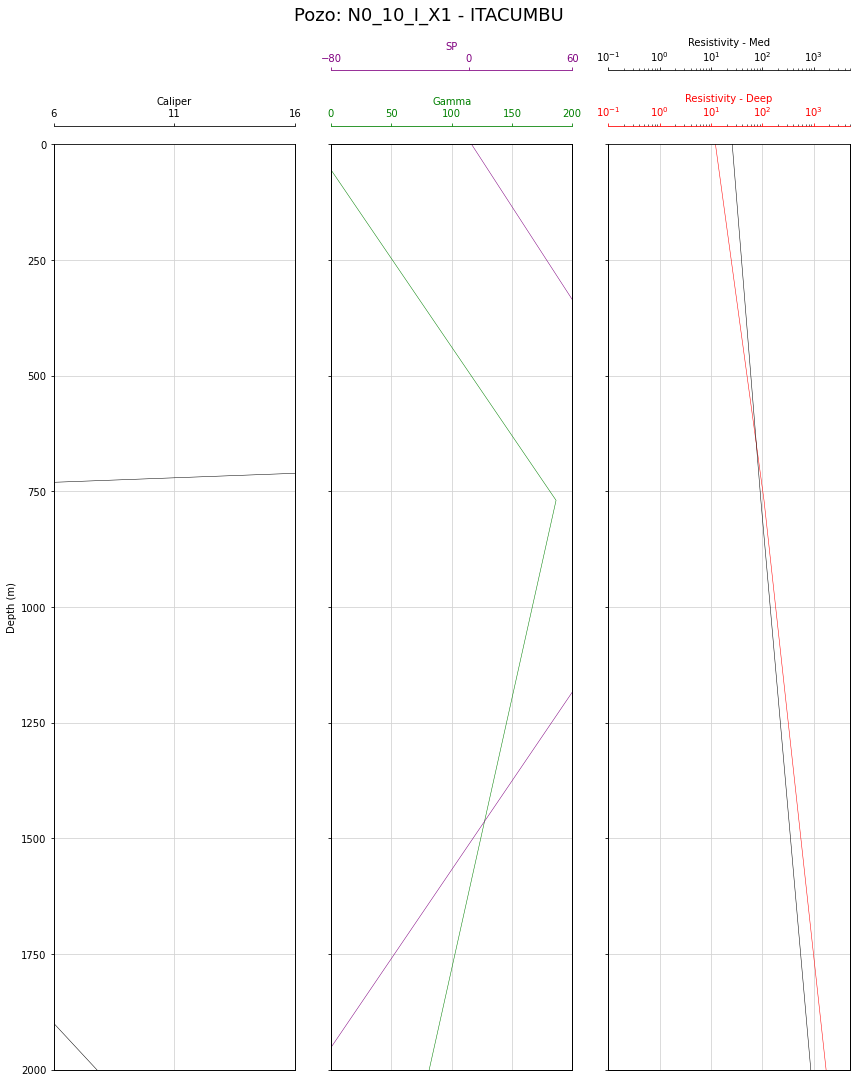

In [176]:
fig, ax = plt.subplots(figsize=(12,15))

# Create a dictionary of formations with a top and bottom depth
formations = {"A":[470, 900], 
              "B": [900, 1370],
              "C": [1370, 1553],
              "D": [1553, 1668],
              "E": [1668, 1778]}

# Select the same number of colours as there are formations
zone_colours = ["red", "blue", "green", "orange", "purple"]




#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)
#ax6 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax4.twiny()
ax6 = ax2.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)


# Caliper track
ax1.plot(well["CALI"], well.index, color = "black", linewidth = 0.5)
ax1.set_xlabel("Caliper")
ax1.set_xlim(6, 16)
ax1.set_ylabel("Depth (m)")
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
#ax1.fill_betweenx(well_nan.index, 8.0, well["CALI"], facecolor='yellow')
ax1.set_xticks([6,  11, 16])


# Gamma Ray track
ax2.plot(well["GR"], well.index, color = "green", linewidth = 0.5)
ax2.set_xlabel("Gamma")
ax2.xaxis.label.set_color("green")
ax2.set_xlim(0, 200)
ax2.tick_params(axis='x', colors="green")
ax2.spines["top"].set_edgecolor("green")
ax2.title.set_color('green')
ax2.set_xticks([0, 50, 100, 150, 200])
#ax1.fill_betweenx(well_nan.index, well["GR"], 200, facecolor='yellow')

# Resistivity track
ax4.plot(well["ILD"], well.index, color = "red", linewidth = 0.5)
ax4.set_xlabel("Resistivity - Deep")
ax4.set_xlim(0.1, 5000)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.semilogx()

# Resistivity track - Curve 2
ax7.plot(well["ILM"], well.index, color = "black", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Med")
ax7.set_xlim(0.1, 5000)
ax7.xaxis.label.set_color("black")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_edgecolor("black")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()


# Spontaneous Potencial
ax6.plot(well["SP"], well.index, color = "purple", linewidth = 0.5)
ax6.set_xlabel("SP")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.set_xlim(-80, 60)
ax6.xaxis.label.set_color("purple")
ax6.tick_params(axis='x', colors="purple")
ax6.spines["top"].set_edgecolor("purple")
ax6.xaxis.set_ticks_position("top")
ax6.set_xticks([-80, 0, 60])



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax4]:
    ax.set_ylim(2000, 0)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    #for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        #ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    

for ax in [ax2, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)

nombre='Pozo: '+ las.well.WELL.value + ' - ' + las.well.FLD.value
    
fig.suptitle(nombre, y=1, ha='center', fontsize=18)
plt.tight_layout()

fig.subplots_adjust(wspace = 0.15)
plt.savefig('pozo Pelado.jpg')
plt.show()

In [177]:
well['FM'] = 0

well['FM'][(well.index > 470) & (well.index <= 900)] = 'TACUAREMBO'
well['FM'][(well.index > 900) & (well.index <= 1370)] = 'BUENA VISTA'
well.head()

<ipython-input-177-fe8b71b24afc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['FM'][(well.index > 470) & (well.index <= 900)] = 'TACUAREMBO'
<ipython-input-177-fe8b71b24afc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['FM'][(well.index > 900) & (well.index <= 1370)] = 'BUENA VISTA'


,ILD,ILM,SFLU,SP,DT,DATA,CALI,RHOB,DRHO,PEF,...,POTA,SGR,CGR,W1NG,W2NG,W3NG,W4NG,W5NG,CS,FM
DEPT:2,,,,,,,,,,,,,,,,,,,,,
2100.072,706.000,2000.0,1879.500,-267.000,54.438,NaN,12.367,2.723,0.118,4.469,...,2.49,71.688,54.492,189.875,77.625,23.547,2.889,2.26,1469.136,0
2099.920,725.978,2000.0,1879.500,-267.250,54.438,NaN,12.367,2.723,0.120,4.625,...,2.49,71.688,54.617,189.875,77.625,23.547,2.889,2.26,1471.572,0
2099.767,1999.079,2000.0,1879.500,-267.562,54.438,NaN,12.367,2.727,0.121,4.520,...,2.49,71.688,54.680,189.875,77.625,23.547,2.889,2.26,1474.011,0
2099.615,2000.000,2000.0,1907.990,-267.875,54.438,NaN,12.367,2.739,0.126,4.453,...,2.49,71.688,54.719,189.875,77.625,23.547,2.889,2.26,1475.232,0
2099.462,2000.000,2000.0,1876.249,-268.125,54.438,NaN,12.367,2.750,0.135,4.715,...,2.49,71.688,54.742,189.875,77.625,23.547,2.889,2.26,1477.670,0


In [179]:
well.to_excel('itac.xlsx')